# <center> Streaming Platform Analyse</center>

**Contexte** :


**Objectifs** :

---

### Plan :




---

## Disney - Movies and TV Shows
---

**Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.**


Dataset contains 12 columns:

    1. show_id: Unique ID for every Movie / Tv Show
    2. type: A Movie or TV Show
    3. title: Title of the Movie / Tv Show
    4. director: Director of the Movie
    5. cast: Actors involved in the Movie / Show
    6. country: Country where the movie / show was produced
    7. date_added: Date it was added on Netflix
    8. release_year: Actual Release year of the move / show
    9. rating: TV Rating of the movie / show
    10. duration: Total Duration - in minutes or number of seasons
    11. listed_in: Genre of the Movie/TV Show
    12. description: Summary of the Movie/TV Show



### Load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data/disney_plus_titles.csv')
data = data.set_index('show_id')

In [3]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### Quick describe

In [4]:
# netflix_df.shape  # number of rows and features

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, s1 to s1450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   cast          1260 non-null   object
 4   country       1231 non-null   object
 5   date_added    1447 non-null   object
 6   release_year  1450 non-null   int64 
 7   rating        1447 non-null   object
 8   duration      1450 non-null   object
 9   listed_in     1450 non-null   object
 10  description   1450 non-null   object
dtypes: int64(1), object(10)
memory usage: 135.9+ KB


In [5]:
duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 11)


In [6]:
data.isnull().sum() # checking for Na/Null values

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

There are some null values in the `director`,  `cast`,  `countries`, `date_added` and `rating` variables. 

In [9]:
data.rating.unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

In [10]:
def cleaning(dt: pd.DataFrame):
    df = dt.copy()
    df.drop(['director','cast'],axis = 1,inplace = True)
    
    df.dropna(axis=0, subset=['date_added'], inplace=True)
    
    df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0])
    df['country'] = df['country'].fillna(df['country'].mode().iloc[0])

    return df

data_cleaned = cleaning(data)

In [11]:
data_cleaned.isnull().sum() # checking for Na/Null values


type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Some Data explo + Feature engeenering

In [12]:
data['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [13]:
data['type'].value_counts()

type
Movie      1052
TV Show     398
Name: count, dtype: int64

#### Feature 2: Country

In [14]:
# netflix_df['type'].plot(kind='bar', stacked=True)
temp_df = data['country'].value_counts()
temp_df

country
United States                                                  1005
United States, Canada                                            30
United Kingdom                                                   23
United States, United Kingdom                                    22
Canada, United States                                            17
                                                               ... 
Ireland, United States                                            1
Ireland, United Kingdom, United States, South Korea, Canada       1
United States, South Korea, France                                1
United States, Australia, France, Canada                          1
United States, Ireland                                            1
Name: count, Length: 89, dtype: int64

In [17]:
# netflix_df.groupby(['rating']).size().reset_index(name='count').sort_values(by='count', ascending=False)
data['rating'].value_counts()

rating
TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: count, dtype: int64

In [18]:
data['listed_in'].value_counts()

listed_in
Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: count, Length: 329, dtype: int64

In [19]:
def feature_eng(data: pd.DataFrame, cols_to_explode: list = ['country', 'listed_in'] ) -> pd.DataFrame:
    df = data.copy()
    # first explode celll with multiple values
    for col in cols_to_explode:
        print(f"--> Processing col: '{col}'")
        df[col]  = df[col].str.split(",")
        df = df.explode(column=col)
        df[col]  = df[col].str.strip()
    
    # rename list_in to Genre
    df = df.rename(columns={'listed_in':'Genre'})
    
    # set cols type
    df["type"] = df["type"].astype("category")
    df["country"] = df["country"].astype("category")
    df["Genre"] = df["Genre"].astype("category")
    df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")  # or format="mixed"
    
    # process duration
    print(f"--> Processing col: 'duration'")
    def ftc(row):
        duration = row["duration"] if row['type'] == 'Movie' else 10*45*int(row["duration"])
        return duration
    df['duration']=df['duration'].str.replace(' min','')
    df['duration']=df['duration'].str.replace(' Seasons','').str.replace(' Season','')
    df["duration"] = df["duration"].astype("int")
    df['duration'] = df.apply(lambda row: ftc(row),axis=1)
    
    return df


data_processed = feature_eng(data_cleaned)
data_processed.shape

--> Processing col: 'country'
--> Processing col: 'listed_in'
--> Processing col: 'duration'


(4733, 9)

In [20]:
data_processed

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2021-11-26,2016,TV-G,23,Animation,Join Mickey and the gang as they duck the halls!
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2021-11-26,2016,TV-G,23,Family,Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,United States,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,United States,2021-11-26,2011,TV-G,23,Animation,Sid the Sloth is on Santa's naughty list.
s3,Movie,Ice Age: A Mammoth Christmas,United States,2021-11-26,2011,TV-G,23,Comedy,Sid the Sloth is on Santa's naughty list.
...,...,...,...,...,...,...,...,...,...
s1449,Movie,Bend It Like Beckham,United States,2020-09-18,2003,PG-13,112,Comedy,Despite the wishes of their traditional famili...
s1449,Movie,Bend It Like Beckham,United States,2020-09-18,2003,PG-13,112,Coming of Age,Despite the wishes of their traditional famili...
s1450,Movie,Captain Sparky vs. The Flying Saucers,United States,2020-04-01,2012,TV-G,2,Action-Adventure,View one of Sparky's favorite home movies.


In [21]:
data_processed[data_processed['type']!='Movie']

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Docuseries,A three-part documentary from Peter Jackson ca...
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Historical,A three-part documentary from Peter Jackson ca...
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Music,A three-part documentary from Peter Jackson ca...
s7,TV Show,Hawkeye,United States,2021-11-24,2021,TV-14,450,Action-Adventure,Clint Barton/Hawkeye must team up with skilled...
s7,TV Show,Hawkeye,United States,2021-11-24,2021,TV-14,450,Superhero,Clint Barton/Hawkeye must team up with skilled...
...,...,...,...,...,...,...,...,...,...
s1418,TV Show,X-Men: Evolution,United States,2019-11-12,2000,TV-Y7,1800,Animation,X-Men: Evolution features the team as teenager...
s1418,TV Show,X-Men: Evolution,United States,2019-11-12,2000,TV-Y7,1800,Kids,X-Men: Evolution features the team as teenager...
s1435,TV Show,Smart Guy,United States,2019-10-01,1996,TV-G,1350,Comedy,A genius tries to fit in as a high school soph...


In [22]:
data_cleaned[data_cleaned['type']!='Movie']

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s5,TV Show,The Beatles: Get Back,United States,"November 25, 2021",2021,TV-G,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
s7,TV Show,Hawkeye,United States,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
s8,TV Show,Port Protection Alaska,United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
s9,TV Show,Secrets of the Zoo: Tampa,United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
s14,TV Show,"Dr. Oakley, Yukon Vet",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...
s1407,TV Show,Wild Yellowstone,Germany,"November 12, 2019",2015,TV-PG,1 Season,"Animals & Nature, Docuseries, Travel",Wild Yellowstone captures the beauty and essen...
s1413,TV Show,Wizards of Waverly Place,United States,"November 12, 2019",2007,TV-G,4 Seasons,"Comedy, Coming of Age, Fantasy","Alex, Justin, and Max Russo are not your ordin..."
s1415,TV Show,Wolverine and The X-Men,United States,"November 12, 2019",2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...


### Data viz

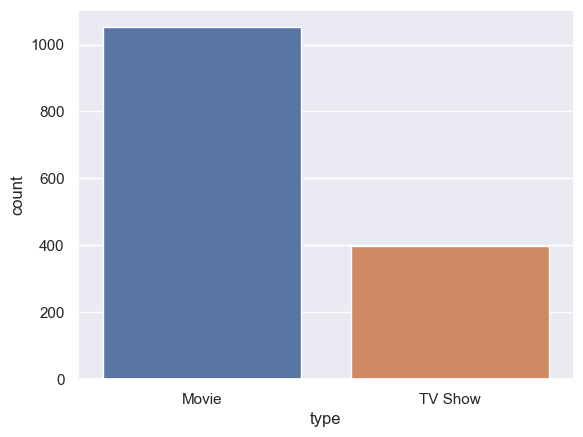

In [23]:
import plotly.express as px
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, hue='type')

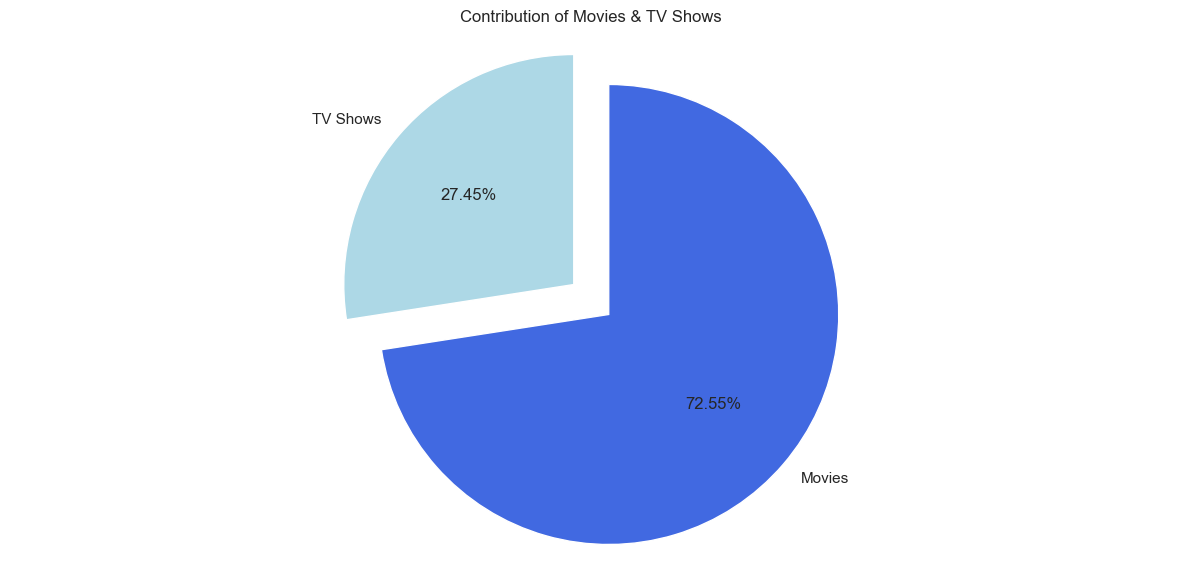

In [24]:


plt.figure(figsize=(15, 7))
labels=['TV Shows', 'Movies']
plt.pie(data['type'].value_counts().sort_values(),
        labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',
        colors=['lightblue','royalblue'], startangle = 90)

plt.title('Contribution of Movies & TV Shows')
plt.axis('equal')
plt.show()



Text(0.5, 1.0, 'Most of Top 7 shows are released based on rating')

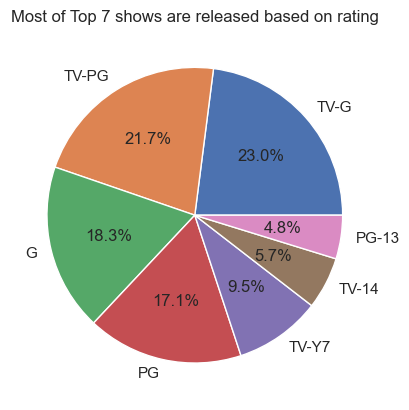

In [25]:
plt.pie(data['rating'].value_counts().head(7),
        labels=data['rating'].value_counts().head(7).index,
        autopct='%1.1f%%')
plt.title('Most of Top 7 shows are released based on rating')




    TV-MA - Mature content
    TV-14 - Content for ages 14 and up
    TV-PG - Content for very young audiences including children for ages 2-6years
    R - Restricted for ages under 17
    PG-13 - Parental guidance for children under 13



In [26]:
import plotly.express as px
import seaborn as sns

px.histogram(data_processed, x="country", color="type").update_xaxes(categoryorder="total descending")



C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [27]:

px.histogram(data_processed, x="release_year")




Text(0, 0.5, 'Number of shows')

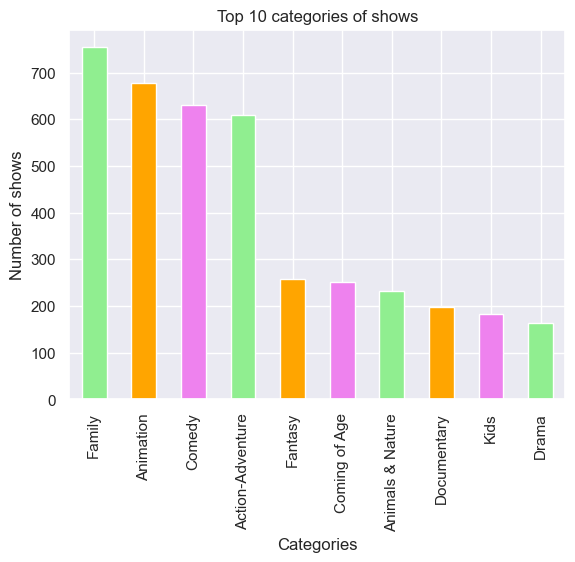

In [28]:
data_processed['Genre'].value_counts().head(10).plot(kind='bar',
                                                           title='Top 10 categories of shows',
                                                           color=['lightgreen','orange','violet'])
plt.xlabel('Categories')
plt.ylabel('Number of shows')



### save Final dataset

In [31]:
data_processed.to_csv('data/data_disney_cleaned.csv')  #, index=False)